# **Open Ended Lab**

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Loading the datasets**

In [ ]:
true = pd.read_csv('/content/True.csv')
fake = pd.read_csv('/content/Fake.csv')

<ipython-input-3-94039c9f2c94>:2: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake = pd.read_csv('/content/Fake.csv')


In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Assigning Labels**

In [ ]:
true['label'] = 1
fake['label'] = 0

**Combine and shuffle**

In [ ]:
df = pd.concat([true, fake], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

**Keeping only relevant columns**

In [ ]:
df = df[['title', 'text', 'label']]
df.dropna(inplace=True)

In [ ]:
df.head()

,title,text,label
0,THIS NEEDS TO GO VIRAL! HOMELAND SECURITY WHIS...,Philip Haney is a lone Patriot in the war on e...,0
1,ESPN Reporter Says Trump’s Supporters Are Whi...,"Just a few days ago, SportsCenter anchor Jemel...",0
2,CELEBRITY CRUISE LINE CEO Makes Political Stat...,Perhaps Celebrity Cruises didn t get the memo ...,0
3,South Korean army says it conducted successful...,SEOUL (Reuters) - The South Korean army said o...,1
4,Trump and Christie laid foundation of their al...,NEW YORK (Reuters) - The political alliance se...,1


**Data preprocessing**

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Cleaning text**

In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words = set(ENGLISH_STOP_WORDS)

def clean(text):
    # lowercase and remove punctuation
    text = re.sub(r"[^\w\s]", "", text.lower())
    # tokenzing
    tokens = text.split()
    # removing stopwords
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)
df['clean_text'] = df['text'].apply(clean)


**TF-IDF vectorization**

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['label']

**Train-Test Split**

In [ ]:
# using 80% data for training and 20% data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training Logistic Regression Model**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.990851978397443


**Confusion Matrix**

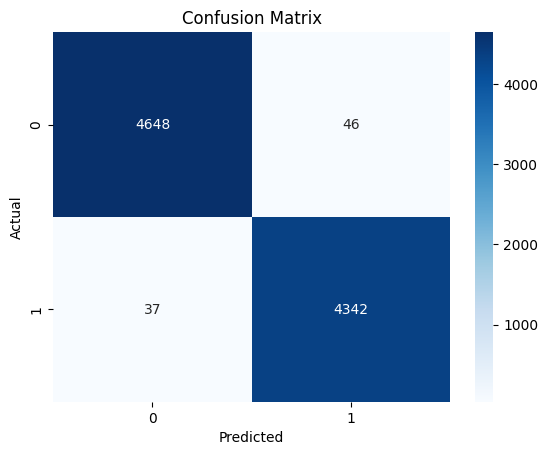

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4694
           1       0.99      0.99      0.99      4379

    accuracy                           0.99      9073
   macro avg       0.99      0.99      0.99      9073
weighted avg       0.99      0.99      0.99      9073



# **Exploratory Data Analysis (EDA)**

**the distribution of real and fake news**

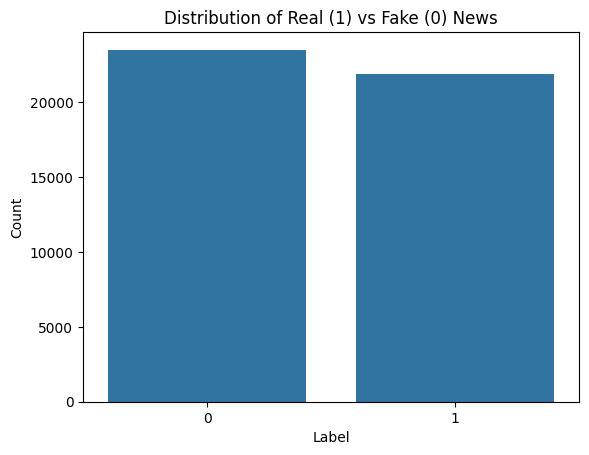

In [ ]:
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Distribution of Real (1) vs Fake (0) News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

**word cloud for real news**

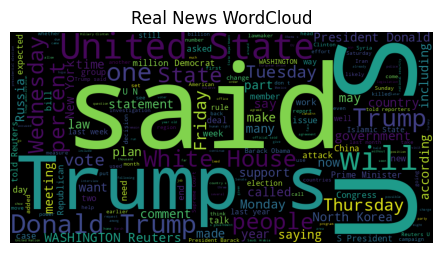

In [ ]:
from wordcloud import WordCloud
real_text = df[df['label'] == 1]['text'].str.cat(sep=' ')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=800, height=400).generate(real_text))
plt.title("Real News WordCloud")
plt.axis('off')
plt.show()

**word cloud for fake news**

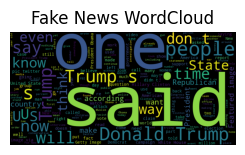

In [ ]:
fake_text = df[df['label'] == 0]['text'].str.cat(sep=' ')

plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=800, height=400).generate(fake_text))
plt.title("Fake News WordCloud")
plt.axis('off')
plt.show()

**Bar Plot for Top Words**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 's'),
  Text(1, 0, 'trump'),
  Text(2, 0, 't'),
  Text(3, 0, 'said'),
  Text(4, 0, 'people'),
  Text(5, 0, 'president'),
  Text(6, 0, 'just'),
  Text(7, 0, 'clinton'),
  Text(8, 0, 'obama'),
  Text(9, 0, 'like'),
  Text(10, 0, 'donald'),
  Text(11, 0, 'new'),
  Text(12, 0, 'news'),
  Text(13, 0, 'hillary'),
  Text(14, 0, 'white')])

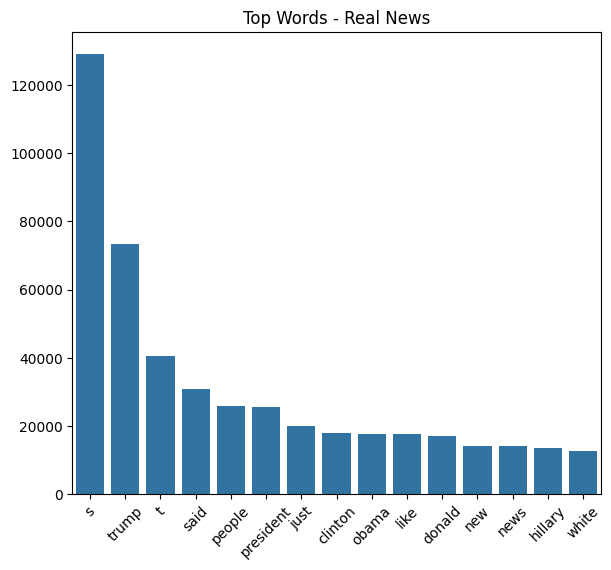

In [ ]:
from collections import Counter

real_words = " ".join(df[df['label'] == 0]['clean_text']).split()
fake_words = " ".join(df[df['label'] == 1]['clean_text']).split()

real_common = Counter(real_words).most_common(15)
fake_common = Counter(fake_words).most_common(15)

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(x=[word for word, _ in real_common], y=[count for _, count in real_common])
plt.title("Top Words - Real News")
plt.xticks(rotation=45)

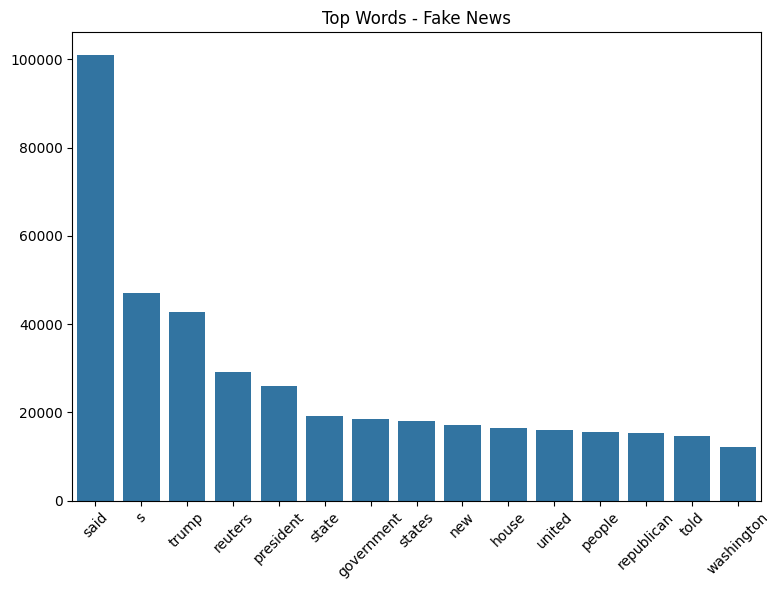

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 2)
sns.barplot(x=[word for word, _ in fake_common], y=[count for _, count in fake_common])
plt.title("Top Words - Fake News")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Distribution Plot of Text Length**

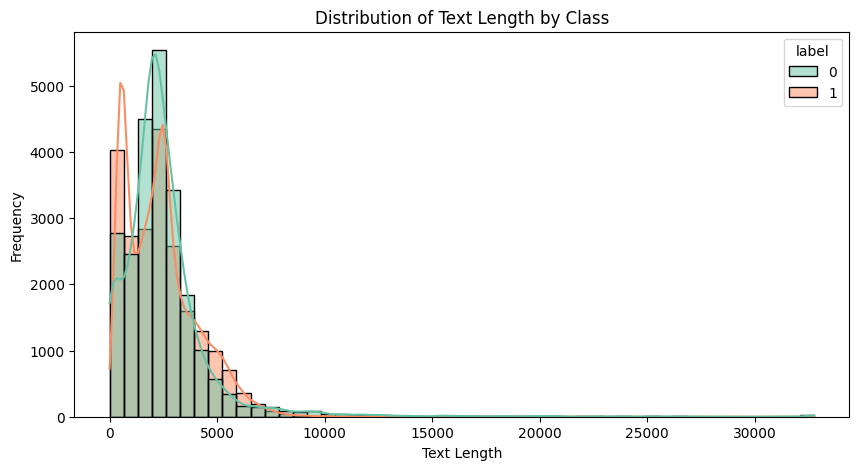

In [ ]:
df['text_len'] = df['text'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='text_len', hue='label', bins=50, kde=True, palette='Set2')
plt.title("Distribution of Text Length by Class")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# **Bonus Tasks**

**Deployment**

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [ ]:
import joblib

joblib.dump(model, "model.pkl")
joblib.dump(tfidf, "tfidf.pkl")

['tfidf.pkl']

In [ ]:
app_code = """
import streamlit as st
import joblib

model = joblib.load("model.pkl")
vectorizer = joblib.load("tfidf.pkl")

st.title("Fake News Detector")

user_input = st.text_area("Enter news article text:", height=200)

if st.button("Check"):
    if user_input.strip() == "":
        st.warning("Please enter some text.")
    else:
        transformed = vectorizer.transform([user_input])
        prediction = model.predict(transformed)

        if prediction[0] == 1:
            st.success("This news is Real news!")
        else:
            st.error("This news is Fake news!")
"""

with open("app.py", "w") as f:
    f.write(app_code)

In [ ]:
!ngrok config add-authtoken

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
import threading
import os

def run_app():
    os.system("streamlit run app.py")

thread = threading.Thread(target=run_app)
thread.start()

public_url = ngrok.connect(8501, "http")
print("Streamlit App is live at:", public_url)

Streamlit App is live at: NgrokTunnel: "https://d798-34-86-203-85.ngrok-free.app" -> "http://localhost:8501"


**Model Interpretability using SHAP**

In [ ]:
!pip install shap

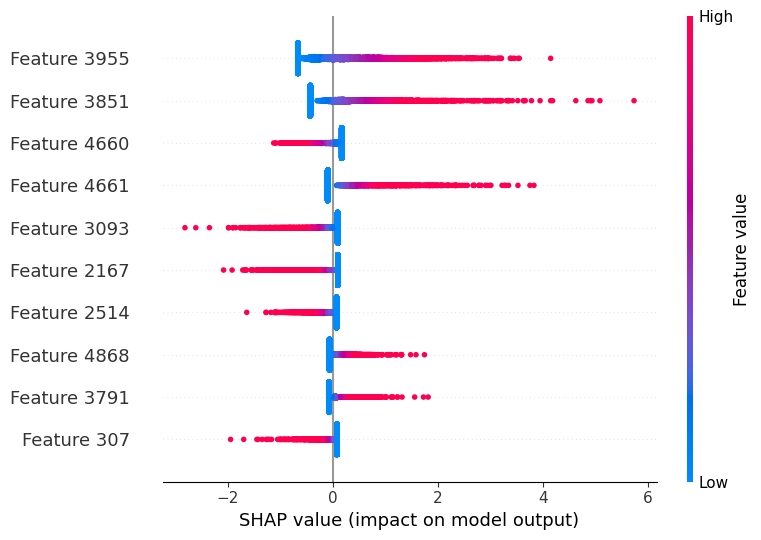

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# plotting the SHAP summary
shap.summary_plot(shap_values, X_test, max_display=10)

**Implementation of Ensemble Techniques**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# creating base models
model1 = LogisticRegression()
model2 = MultinomialNB()
model3 = RandomForestClassifier()

In [ ]:
ensemble = VotingClassifier(estimators=[
    ('lr', model1),
    ('nb', model2),
    ('rf', model3)
], voting='soft')

In [ ]:
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Model Accuracy:", round(accuracy * 100, 2), "%")

Ensemble Model Accuracy: 99.03 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4694
           1       0.99      0.99      0.99      4379

    accuracy                           0.99      9073
   macro avg       0.99      0.99      0.99      9073
weighted avg       0.99      0.99      0.99      9073

